Git Journey

integrating the function u' = u + sin(t)
using the formula for ETD method
exact solution is:

$u(t_{n+1}) = u(t_n)*e^{(c*h)} + e^{(c*h)}*integral(F(u(k+t_n),k+t_n)*e^{-ck}dk) $

Trying to solve:

$u' = cu + sin(t)$

Therefore our F(u,t) = sin(t)

In [862]:
import numpy as np
import matplotlib.pyplot as plt

In [863]:
##compartmentalising for the future
c = 1
## ^ for posterity

def F(t):
    # our non linear component
    return np.sin(t)

def timestep(u_n, I, h):
    # u_n is the previous time step
    # I is the integral of the non linear part
    # h is out time step width
    #print("u_n =", u_n )
    #print("I =", I )
    #print("h =", h )
    return u_n*np.exp(c*h) + I

#Cool now I want to decide what I is. If I choose F is approximately a constant 
def I_const(t,h):
    return F(t)*(np.exp(c*h)-1)/c

In [864]:
T = Total_Time = 5 
h = Step_Size = 0.001
u_0 = Initial_Condition = 5

N = int(T/h) ## Number of points, not including the 0th position
tvec = np.arange(N+1)*h
uvec = np.zeros(N+1)
uvec[0] = u_0


print(I_const(tvec[0],h))

0.0


In [865]:
c = -10
def ETD1(Total_Time, Step_Size, Initial_Condition):
    T = Total_Time
    h = Step_Size
    u_0 = Initial_Condition

    N = int(T/h) ## Number of points, not including the 0th position
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_const(tvec[i],h)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec




In [866]:
y,x = ETD1(T,h,u_0)

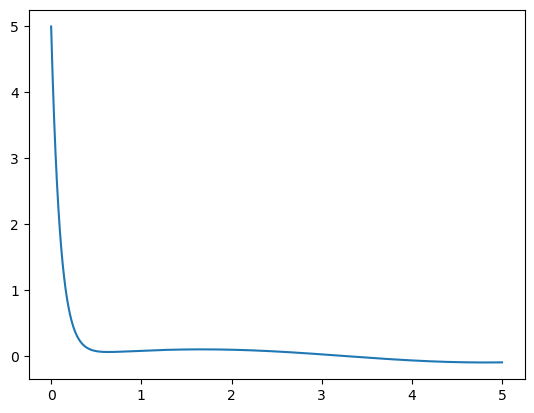

In [867]:
plt.plot(x,y)

Well we know theres an analytic solution to this given by

 $u_0 e^{ct} + \frac{e^{ct}-c*sin(t)-cos(t)}{1+c^2}$

In [868]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

<function matplotlib.pyplot.show(close=None, block=None)>

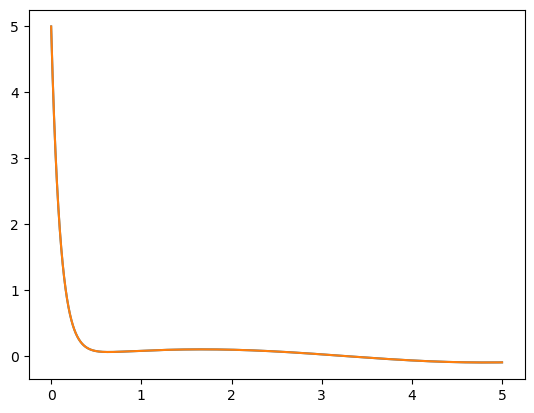

In [869]:
plt.plot(x,y)
plt.plot(x,U_true(x,5))
plt.show

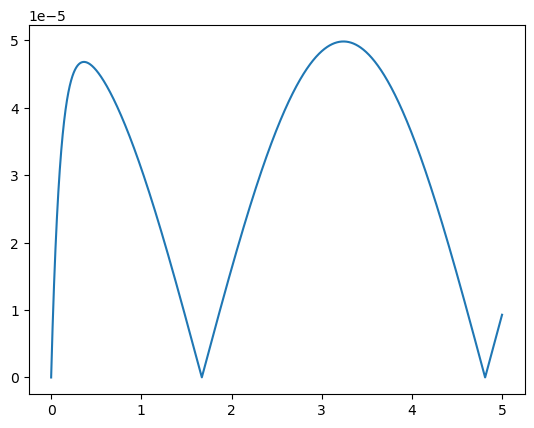

In [870]:
plt.plot(x,np.abs(y - U_true(x,5)))

In [871]:
##Maybe taking F to be a constant is too far. 
## lets do ETD2

def I_nonconst(t,h):
    return F(t)*((1+h*c)*np.exp(1)**(c*h) -1 - 2*h*c)/(h*c**2) +F(t-h)*(1+h*c-np.exp(1)**(c*h))/(h*c**2)

In [872]:
def ETD2(Total_Time, Step_Size, Initial_Condition):
    T = Total_Time
    h = Step_Size
    u_0 = Initial_Condition

    N = int(T/h) ## Number of points, not including the 0th position
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_nonconst(tvec[i],h)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [873]:
y2,x2 = ETD2(T,h,u_0)

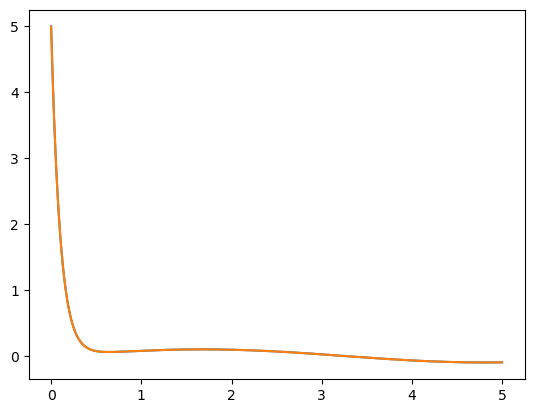

In [874]:
plt.plot(x2,y2)
plt.plot(x,U_true(x,5))

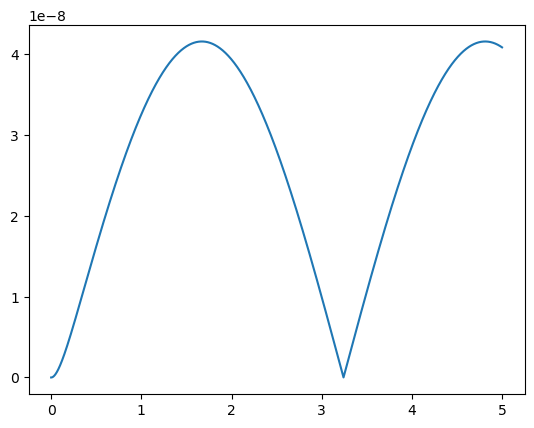

In [875]:
plt.plot(x,np.abs(y2 - U_true(x,5)))

So now we have some methods and we want to find how their error scales

In [876]:
T = Total_Time = 5
u_0 = Initial_Condition = 5

In [877]:
## lets make a vector to store the range of step size values we want to test
errorN = 13


Test_H = np.zeros(errorN)

for i in range(0,errorN):
    Test_H[i] = 10**(-i/2)

In [878]:
## now for order of operations, the total time T and initial conditions u_0 are constanst so we dont need to worry about those.

C:\Users\Eleph\AppData\Local\Temp\ipykernel_20684\1936907451.py:10: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
C:\Users\Eleph\AppData\Local\Temp\ipykernel_20684\1936907451.py:12: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])


Text(0, 0.5, 'error from true soln')

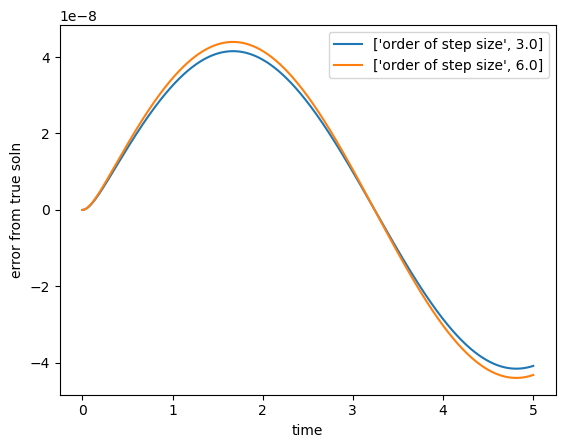

In [879]:
Error_Vec1 = np.zeros(errorN)
Error_Vec2 = np.zeros(errorN)

for i in range(0, errorN):
    (y1,x) = ETD1(T, Test_H[i], u_0)
    y2 = ETD2(T, Test_H[i], u_0)[0]
    yTrue = U_true(x,u_0)
    
    if i == 6:
        plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    elif i == 12:
        plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    Error_Vec1[i] = np.linalg.norm(y1-yTrue)
    Error_Vec2[i] = np.linalg.norm(y2-yTrue)
plt.legend()
plt.xlabel("time")
plt.ylabel("error from true soln")

    


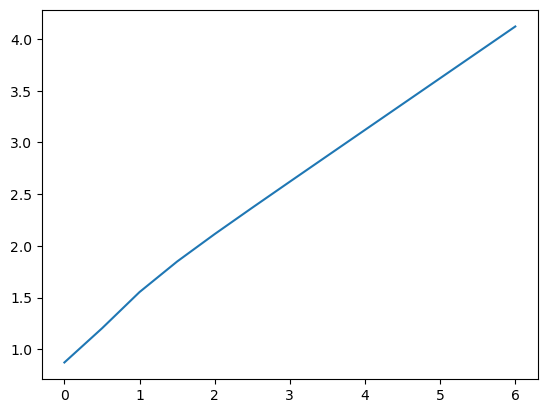

In [880]:
plt.plot(-np.log10(Test_H), -np.log10(Error_Vec1))

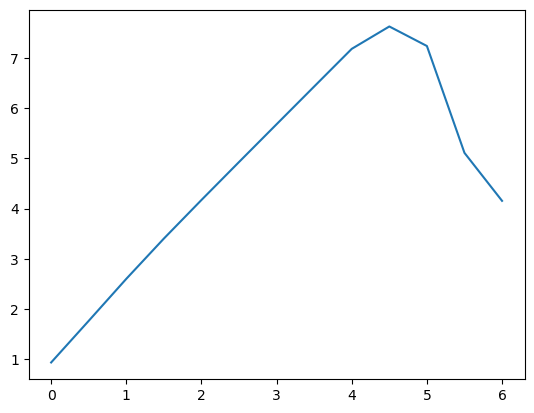

In [881]:
plt.plot(-np.log10(Test_H), -np.log10(Error_Vec2))